In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats as stats
from scipy.stats import norm

Resulting actions after analysis:
    1. Remove outlier id 1299, 524
    2. Apply log transformations to 1stFlrSF.
    3. Apply log + 1 transformations to TotalBsmtSF, GarageArea (Has a lot of zero values, thus "+ 1")

In [2]:
#loading data
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [5]:
print("Number of features: {}".format(len(train.columns)))

Number of features: 81


In [15]:
numeric = []
categorical = []
for col in train.columns:
    if train[col].dtype != 'object':
        numeric.append(col)
    else:
        categorical.append(col)

# Keep in mind, though some have been categorized as numerical, the features are
# in fact categorical (e.g. YearBuilt)
print("Features that are numerical: {}".format(len(numeric)))
print("Features that are categorical: {}".format(len(categorical)))

Features that are numerical: 38
Features that are categorical: 43


We know that from the analysis done in "2-0-house_price_data_exploration_nans" notebook that top features with the highest correlation with SalePrice are:

In [21]:
# YearBuilt       0.522897
# TotRmsAbvGrd    0.533723
# FullBath        0.560664
# 1stFlrSF        0.605852
# TotalBsmtSF     0.613581
# GarageArea      0.623431
# GarageCars      0.640409
# GrLivArea       0.708624
# OverallQual     0.790982

In [29]:
top_corr = ['YearBuilt',
            'TotRmsAbvGrd',
            'FullBath',
            '1stFlrSF',
            'TotalBsmtSF',
            'GarageArea',
            'GarageCars',
            'GrLivArea',
            'OverallQual',
            'SalePrice'
           ]

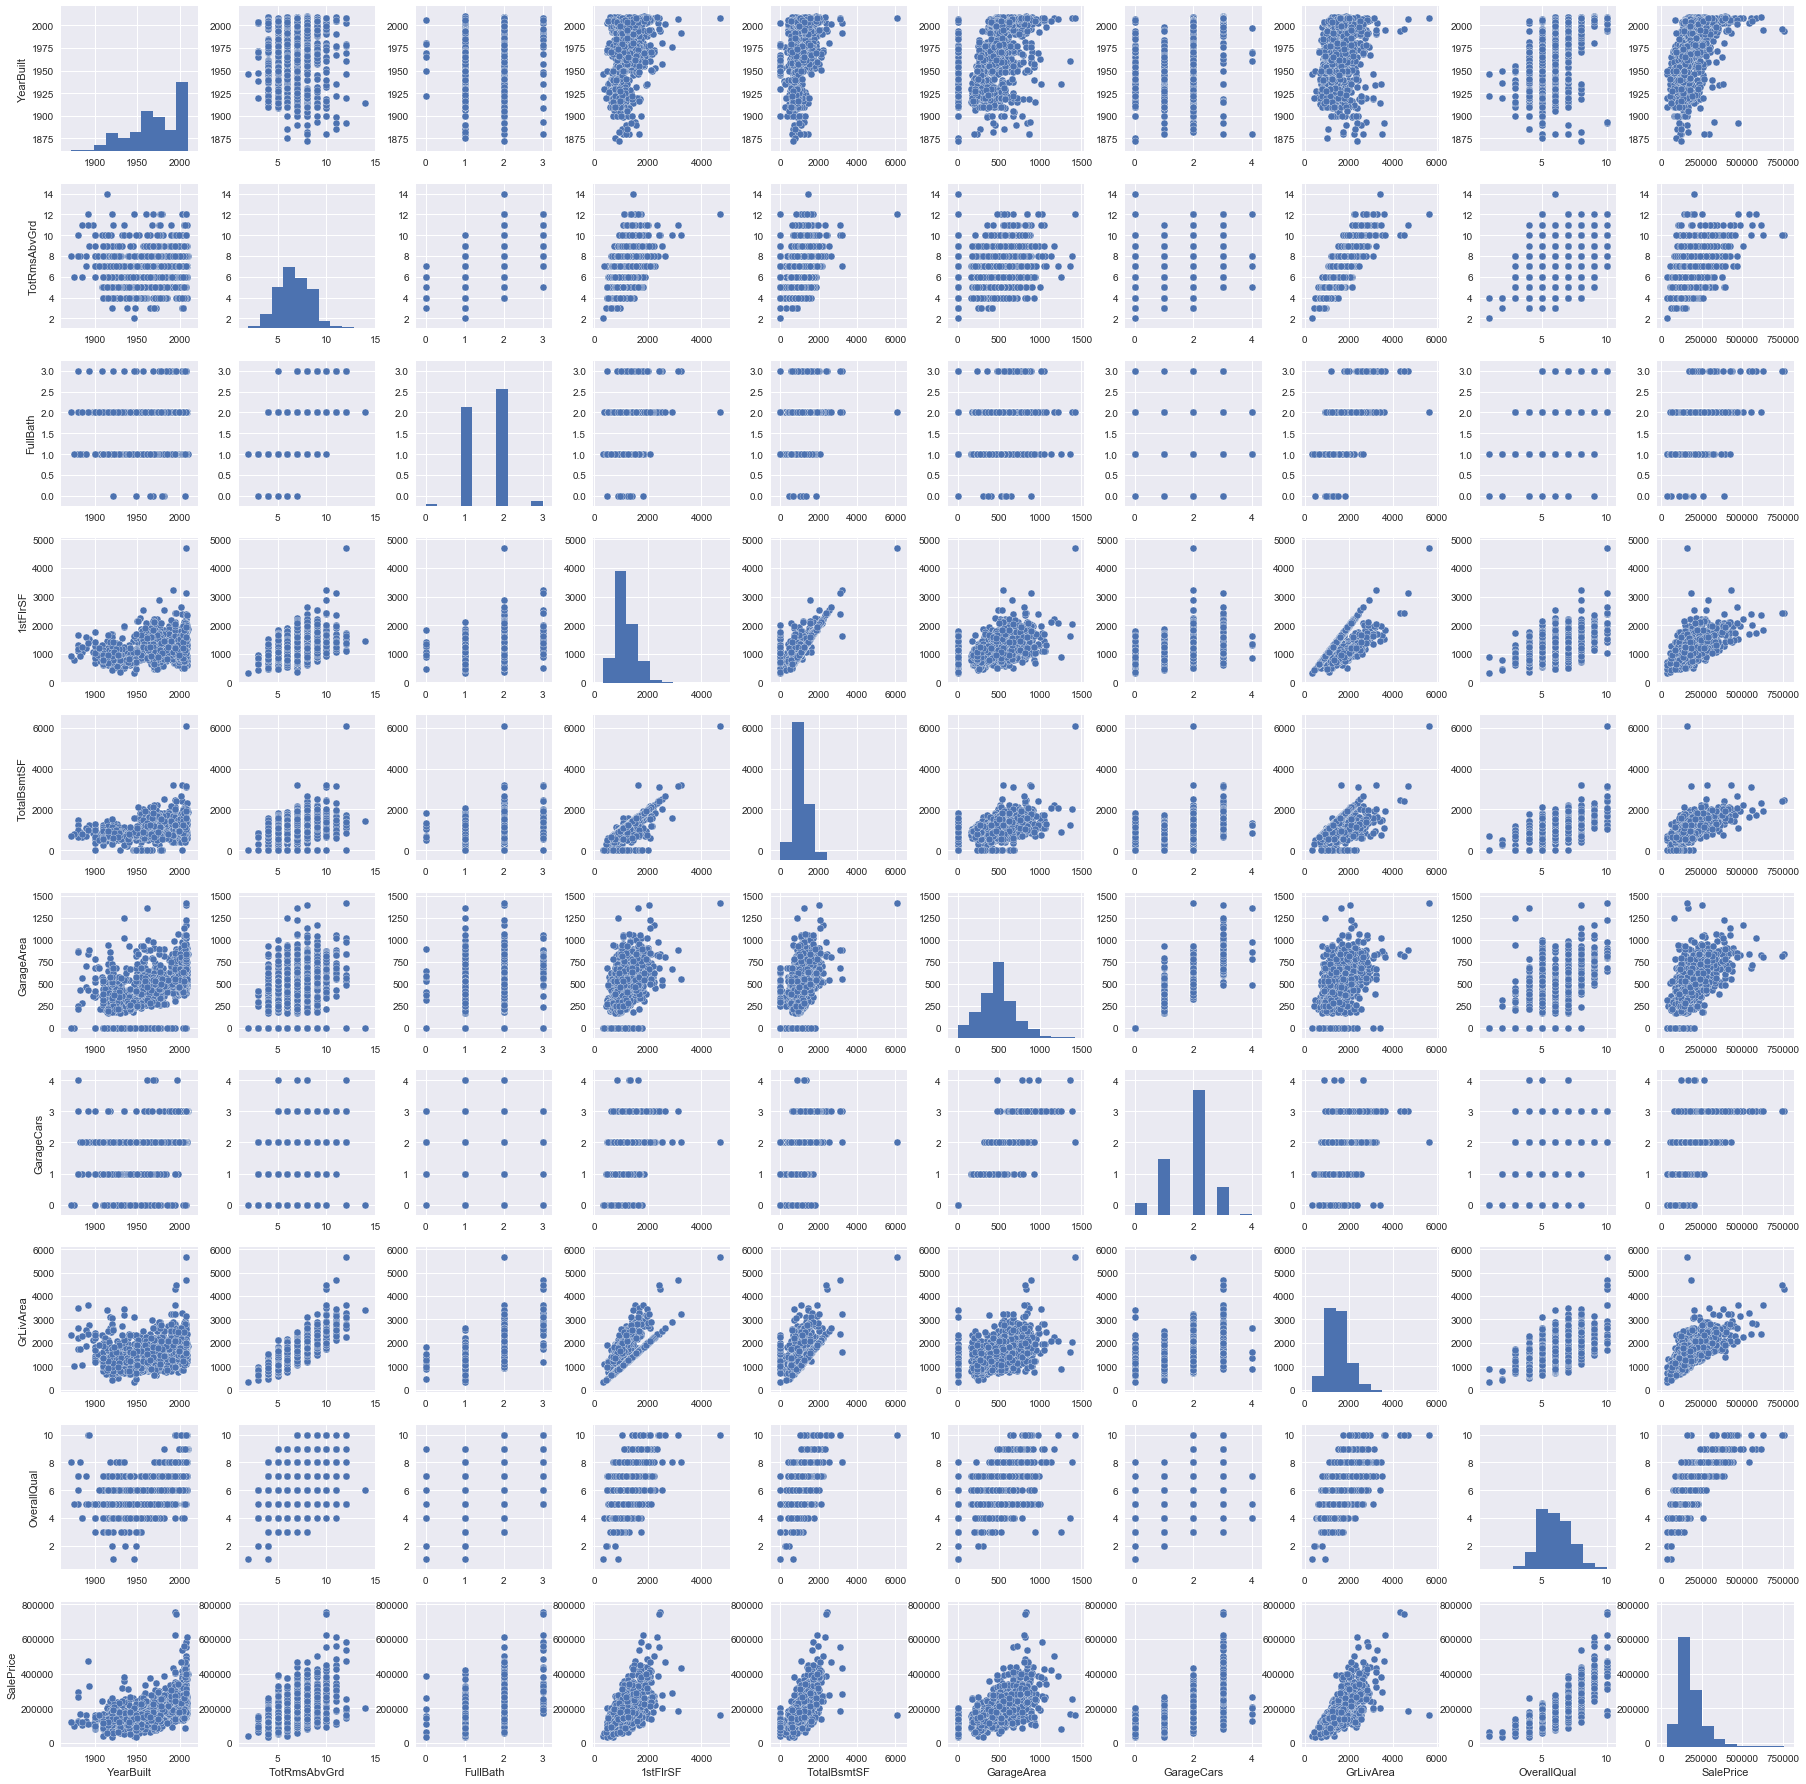

In [30]:
#scatterplot
sns.set()
sns.pairplot(train[top_corr], size = 2.5)
plt.show();

Handle the obvious outliers on first pass.

In [31]:
'1stFlrSF'
'TotalBsmtSF'
'GarageArea'
'GrLivArea'

'GrLivArea'

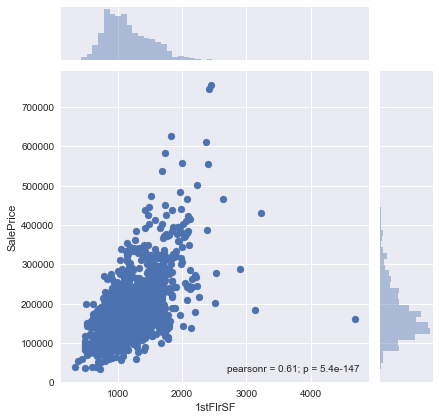

In [32]:
# Remove samples where 1stFlrSF > 4000
sns.jointplot(train['1stFlrSF'], train['SalePrice'])

In [35]:
train[train['1stFlrSF'] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


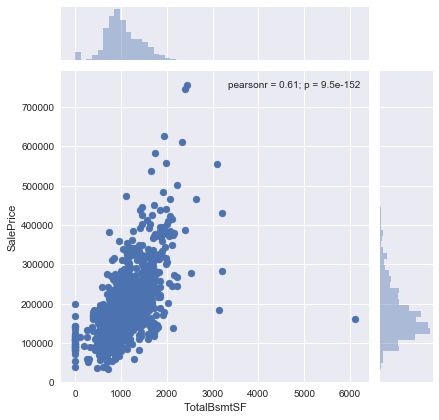

In [37]:
# Remove samples where 'TotalBsmtSF' > 6000
sns.jointplot(train['TotalBsmtSF'], train['SalePrice'])

In [53]:
# We can see that removing the previous outlier would have handled this case as well.
train[train['TotalBsmtSF'] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


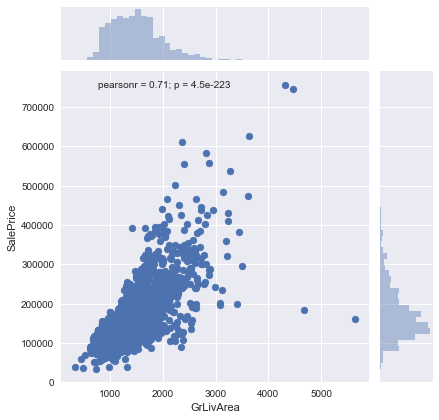

In [54]:
# Remove samples where 'GrLivArea' > 4000 and SalePrice < 200000
sns.jointplot(train['GrLivArea'], train['SalePrice'])

In [55]:
# Since ID 1299 has been handled remove ID 524
train[train['GrLivArea'] > 4000][train['SalePrice'] < 200000]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


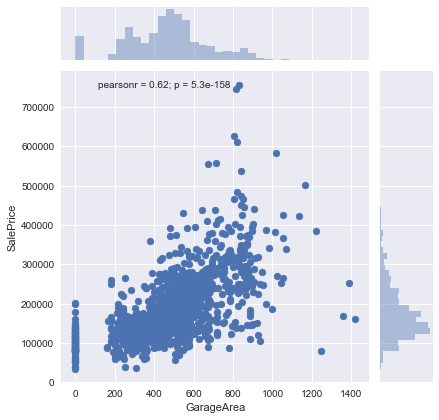

In [56]:
sns.jointplot(train['GarageArea'], train['SalePrice'])

### Check for normality

P-value: 0.0


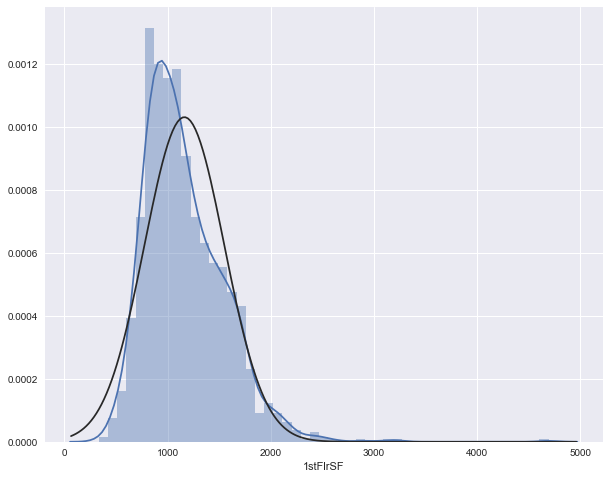

In [63]:
sns.distplot(train['1stFlrSF'], fit=norm)
_, p_value = stats.jarque_bera(train['1stFlrSF'])
print("P-value: {}".format(p_value))
# Reject null, apply log transformation

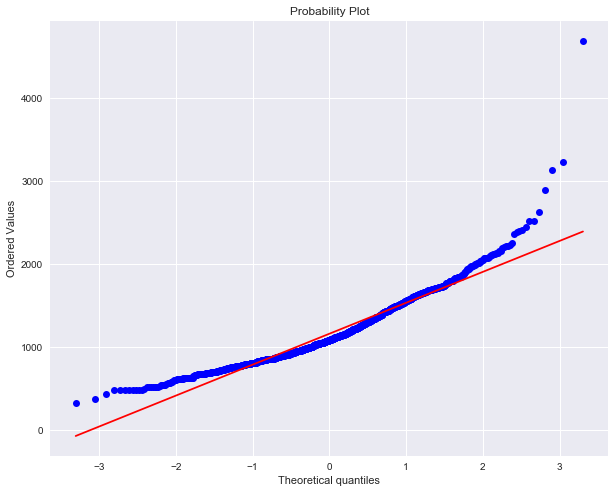

In [64]:
res = stats.probplot(train['1stFlrSF'], plot=plt)

P-value: 0.0


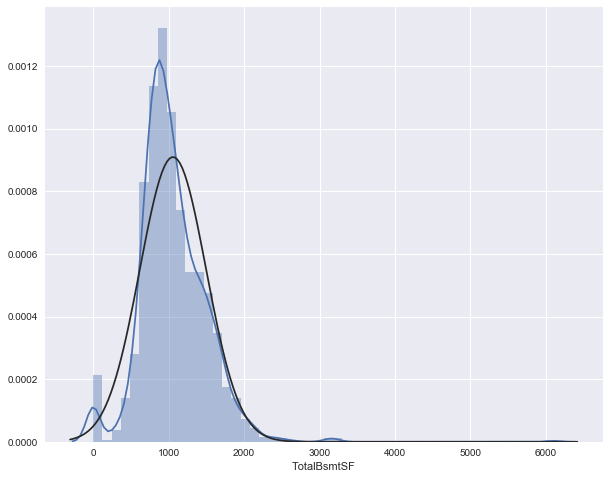

In [65]:
sns.distplot(train['TotalBsmtSF'], fit=norm)
_, p_value = stats.jarque_bera(train['TotalBsmtSF'])
print("P-value: {}".format(p_value))
# Reject null, apply log transformation

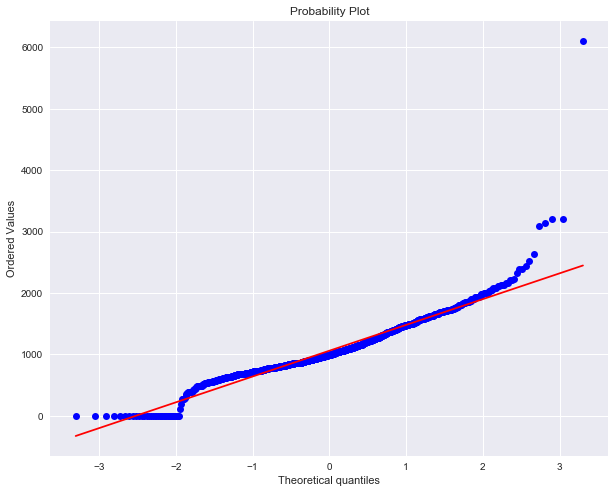

In [67]:
# Need to handle the zero values, as cant apply log to zero.
# Use np.log1p for now...
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

P-value: 2.275957200481571e-13


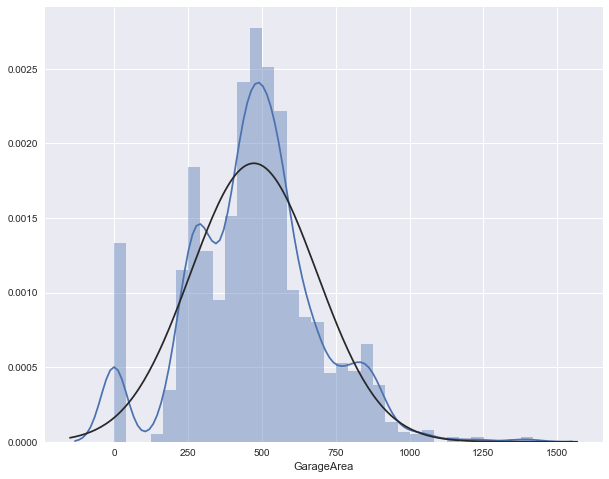

In [68]:
sns.distplot(train['GarageArea'], fit=norm)
_, p_value = stats.jarque_bera(train['GarageArea'])
print("P-value: {}".format(p_value))
# Reject null, apply log transformation
# Use np.log1p for now...

#train['GrLivArea']

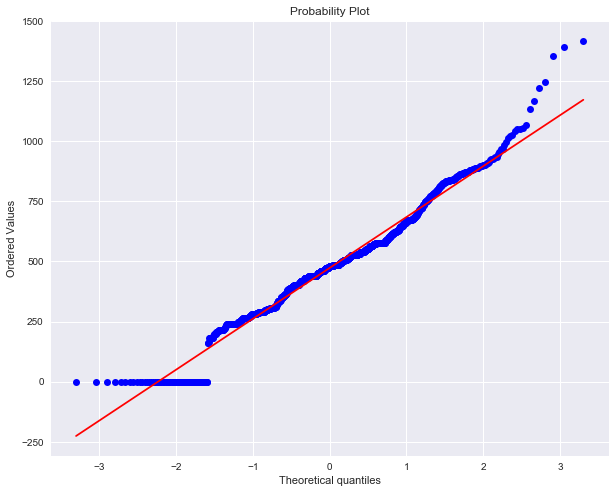

In [69]:
res = stats.probplot(train['GarageArea'], plot=plt)